#Matcha.ipynb: Play with MatCha Model (GPU Recommended)

In [ ]:
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
import requests
from PIL import Image
import torch

device = torch.device("cuda")


model = Pix2StructForConditionalGeneration.from_pretrained("google/matcha-plotqa-v1").to(device)
processor = AutoProcessor.from_pretrained("google/matcha-chartqa")
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/20294671002019.png"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, text="Is the sum of all 4 places greater than Laos?", return_tensors="pt").to(0)
predictions = model.generate(**inputs, max_new_tokens=512)
print(processor.decode(predictions[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

Yes


In [ ]:
query = "Generate underlying data table of the figure below:"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

['plot1.png', 'plot2.png', 'plot3.png', 'handplot.jpg', 'scatterplot.png']


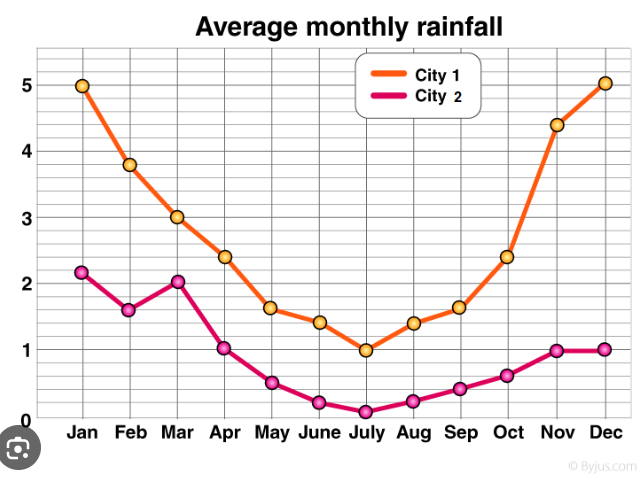

In [ ]:
from PIL import Image
import os

path = "/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project"

# get images from /data/images directory
filenames =[]
images = []
for filename in os.listdir((path+'/data/images')):
  filenames.append(filename)
  images.append(Image.open(path+'/data/images/'+filename))
print(filenames)
images[1]

In [ ]:
inputs = processor(images=images[1], text=query, return_tensors="pt").to(0)
predictions = model.generate(**inputs, max_new_tokens=512)
print(processor.decode(predictions[0], skip_special_tokens=True))

1.25
